# K Nearest Neighbors (KNN)


In [9]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV
import time

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.decomposition import PCA

#importing the dataset as a dataframe
df = pd.read_csv("taxis.csv").dropna()

In [10]:
#Drop variables with zero variance: EmployeeCount, Over18, and StandardHours

#Replacing Yes/No in the target variable (Attrition) with 1/0
df['payment'] = df['payment'].map({'credit card':0, 'cash':1})

In [11]:
#Dropping variables listed above that are correlated
df_final = df.drop(['payment','pickup_zone','dropoff_zone','pickup_borough','dropoff_borough'],axis =1)
#Confirm those variables were sucessfully dropped
df_final

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow
...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green


In [12]:
#Create a function which takes the dataset as input and ouputs the processed dataset
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['pickup'] = le.fit_transform(res_df['pickup'])
    res_df['dropoff'] = le.fit_transform(res_df['dropoff'])
    res_df['passengers'] = le.fit_transform(res_df['passengers'])
    res_df['distance'] = le.fit_transform(res_df['distance'])
    res_df['fare'] = le.fit_transform(res_df['fare'])
    res_df['tip'] = le.fit_transform(res_df['tip'])
    res_df['color'] = le.fit_transform(res_df['color'])
    res_df['tolls'] = le.fit_transform(res_df['tolls'])
    res_df['total'] = le.fit_transform(res_df['total'])
    return res_df

#Run the function on the desired dataset
encoded_df = preprocessor(df)

The next step is to select which features we want to use with KNN and standardize them.

In [15]:
#Selecting features
X = encoded_df.drop(['payment','pickup_zone','dropoff_zone','pickup_borough','dropoff_borough'],axis =1)
y = encoded_df['payment']
y

0       0
1       1
2       0
3       0
4       0
       ..
6428    0
6429    0
6430    1
6431    0
6432    0
Name: payment, Length: 6342, dtype: int64

In [16]:
#Standardizing features
sc = StandardScaler()
X = sc.fit_transform(X)

#Confirm the new mean and standard deviation of the dataset
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


## Split into Train and Test data
To apply K-Nearest-Neighbors, the data must be split into "training" and "test" data. Sklearn's built-in KNeighborsClassifier finds the best number of neighbors with the help of misclassification error.

In [17]:
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 40)

# Classification

In [18]:
neighbors = np.arange(1,11)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

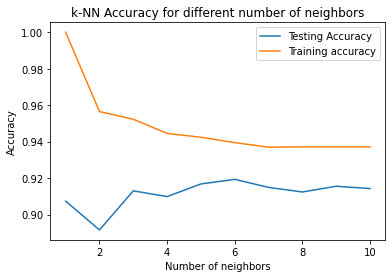

In [19]:
#Plot test accuracy to find the optimal k
plt.title('k-NN Accuracy for different number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Accuracy is highest for n = 9

In [20]:
start = time.time()

#Instantiate the model
knn = KNeighborsClassifier(n_neighbors=9)
#Fit the model with data
knn.fit(X_train, y_train)

end = time.time()
knn_time = end-start
print('Train Time (seconds) of KNN without PCA:',knn_time)

y_pred_knn = knn.predict(X_test)

Train Time (seconds) of KNN without PCA: 0.0032279491424560547


# Performance Analysis
The next step is to conduct a performance analysis of the model. We do this by examining the confusion matrix and the Receiver Operating Characteristic (ROC) curve.

In [21]:
print("Accuracy:", accuracy_score(y_test,y_pred_knn))

Accuracy: 0.9155107187894073


Text(0.5, 257.44, 'Predicted label')

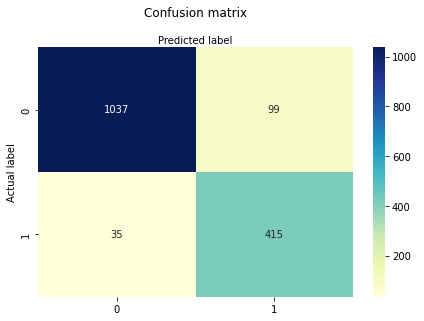

In [22]:
#Creating the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_knn)
class_names=[0,1] # name  of classes

#Creating the figure
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Adding the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [23]:
#Print a nicely formatted report
classify_knn = classification_report(y_test, y_pred_knn)
print("\nClassification Report")
print(classify_knn)


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1136
           1       0.81      0.92      0.86       450

    accuracy                           0.92      1586
   macro avg       0.89      0.92      0.90      1586
weighted avg       0.92      0.92      0.92      1586



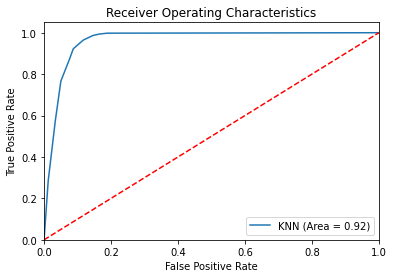

In [24]:
#Plot the ROC curve
knn_roc_auc = roc_auc_score(y_test,y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test,knn.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='KNN (Area = %0.2f)' % knn_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

# Using PCA

In [25]:
# Make an instance of the model and specify that 90% of the variance needs to be retained
n = 90
pca = PCA(n/100)

# Fit the PCA on the training set
pca.fit(X_train)

print('To retain',n,'% of the variation, we needed',pca.n_components_,'components')

To retain 90 % of the variation, we needed 5 components


In [26]:
# Applying transformation to both Training and Test set

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [27]:
#K Nearest Neighbors Classifier with PCA
#Because we previously used n = 9, we will use the same n here

start = time.time()

knn_pca = KNeighborsClassifier(n_neighbors=9)
knn_pca.fit(X_train_pca, y_train)

end = time.time()
knn_time_pca = end-start
print('Train Time (seconds) of KNN with PCA:',knn_time_pca)

y_pred_knn_pca = knn_pca.predict(X_test_pca)

Train Time (seconds) of KNN with PCA: 0.003761768341064453


In [28]:
print("Accuracy:", accuracy_score(y_test,y_pred_knn_pca))

Accuracy: 0.9079445145018915


Text(0.5, 257.44, 'Predicted label')

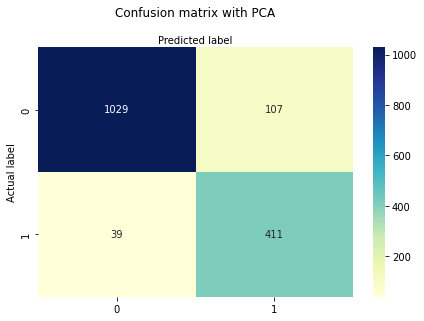

In [29]:
#Creating the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_knn_pca)
class_names=[0,1] # name  of classes

#Creating the figure
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Adding the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix with PCA', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
#Print a nicely formatted report
classify_knn = classification_report(y_test, y_pred_knn_pca)
print("\nClassification Report")
print(classify_knn)


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1136
           1       0.79      0.91      0.85       450

    accuracy                           0.91      1586
   macro avg       0.88      0.91      0.89      1586
weighted avg       0.92      0.91      0.91      1586



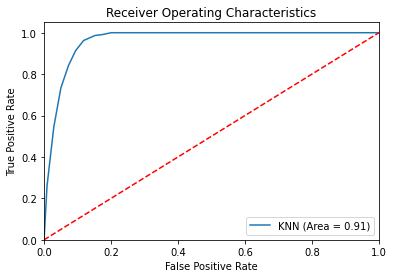

In [31]:
knn_roc_auc_pca = roc_auc_score(y_test,y_pred_knn_pca)
fpr, tpr, thresholds = roc_curve(y_test,knn_pca.predict_proba(X_test_pca)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='KNN (Area = %0.2f)' % knn_roc_auc_pca)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

# Regression

In [32]:
#Instantiate the model
knn_model = KNeighborsRegressor(n_neighbors=3)
#Fit the mdoel with data
knn_model.fit(X_train, y_train)

train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = np.sqrt(mse)
print("Training Root Mean Squared Error:", rmse)

Training Root Mean Squared Error: 0.17961998740334567


In [33]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = np.sqrt(mse)
print('Testing Root Mean Squared Error:', rmse)

Testing Root Mean Squared Error: 0.2626910455269232


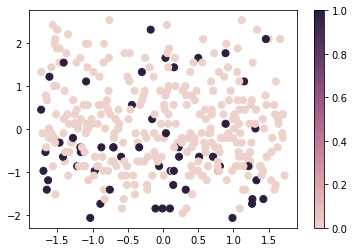

In [89]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

Lets compare mean square error in K nearest regression vs Gradient Descent (Batch size and Stochastic) 

K nearest:
: 0.2626910455269232


Batch Gradiant Descent: 12.57

Stcohastic Gradiant Descent: 78.03



**Winner is K nearest!**